# Valco VICI Valve Controls
## Written by Adel Naim, March 24th 2022
## Robert Black maintains, modifys, and updates code as necessary

This notebook was created to change the position of a Valco 10-position "SF" valve. Visit https://www.vici.com/vval/sf.php for a detailed description of this flow path selector.

The valve features 11 streams (1 input, 10 output). When gas is fed to the inlet stream in the middle of the valve, the gas will emerge from one of the outlet streams depending on the position of the valve.

#####  Although the valve has 10 positions, the code below queries the user to input only odd numbers from 1 to 9. This is because the valve must move by a multiple of 2 (eg. 1 to 3 → moved by 2, 3 to 9 → moved by 6, etc) as a result of how the outlets are related. The diagram below illustrates the orientation of the valve when position 1 is selected.  The "connected" outlets must be moved together, hence the code prevents movement to an even-numbered position.

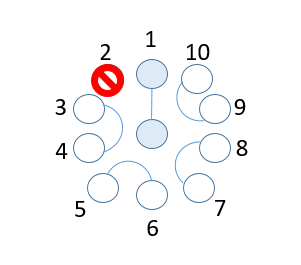


### Serial Connection and Commands
Run the cell below to initiate a serial connection and to define the key functions.

In [4]:
import serial
import time         #These three lines import the necessary modules.
import io

ser = serial.Serial(port = 'COM5',  #Check your device manager and change the COM port here as needed.
                    baudrate = 9600, 
                    bytesize = serial.EIGHTBITS,  
                    parity = serial.PARITY_NONE,   #Establishes a serial connection between valve controller and computer.
                    stopbits = serial.STOPBITS_ONE
                   )

def odd_move(): 
    move = input("Please enter the position which you want to move to.") 
    allowed = ["1","3","5","7","9"]   
    if move not in allowed:                            #Code checks that the user's input is one of the allowed inputs.
        print("You must select either 1,3,5,7, or 9!")            
    elif move in allowed:
         int(move)
         position = f'GO{move}\r'     #Used f string, and serial "GO" command to move valve into user's desired position.
         ser.write(position.encode()) #Serial command communicates and "instructs" the valve controller to change positions.
         time.sleep(1)
        
         ser.write(b'CP\r')     #This serial command prints the current position of the valve.
         time.sleep(0.2)
         _readline()
            
def _readline(): #Used to ensure readline() end at \r since readline() function no longer exists in Python 3.x
    eol = b'\r'
    leneol = len(eol)
    line = bytearray()
    while True:
        c = ser.read(1)
        if c:
            line += c
            if line[-leneol:] == eol:
                break
        else:
            break
    print(bytes(line))
    return bytes(line)

### Run the cell below to change the valve's position as needed.
Ensure the correct port is entered in the cell above, and that the valve controller is connected to your computer via this port.For information on more valve controller commands, visit https://www.vici.com/support/manuals/universal-actuator.pdf.

In [6]:
odd_move()

Please enter the position which you want to move to.9
b'CP09\r'
